In [1]:
import pandas as pd
import os, pathlib, re
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
mem_result_dir = pathlib.Path('mem_results').absolute()
raw_data = []
for path in mem_result_dir.glob('*.dat'):
    match = re.match(r'(\w+)_(\w+)_(\d+)_(\d+).dat', path.name)
    if not match:
        raise ValueError(f'Unexpected file name: {path.name}')
    stream, lib, n_row, i = match.groups()
    with open(path) as f:
        lines = f.readlines()
    lines.pop(0)
    for line in lines:
        match = re.match(r'MEM (([0-9]*[.])?[0-9]+) (([0-9]*[.])?[0-9]+)', line)
        if not match:
            raise ValueError(f'Unexpected line: {line}')
        memory, _, time, _, = match.groups()
        raw_data.append([stream, lib, int(n_row), float(memory), int(i), float(time)])

df = pd.DataFrame(raw_data, columns=['stream', 'lib', 'n_row', 'memory', 'i', 'time'])
df.to_csv('mem_results.csv', index=False)


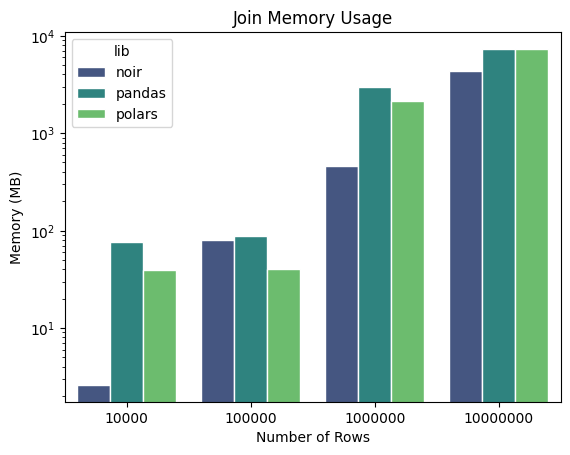

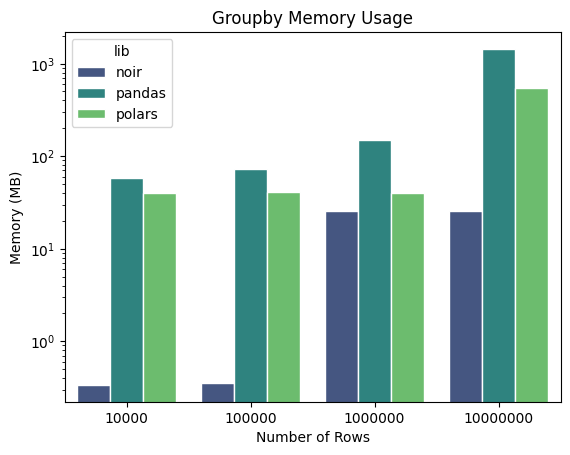

In [9]:
stream_values = df['stream'].unique()
for stream in stream_values:
    df_n_row = df[df['stream'] == stream]
    df_n_row = df_n_row.groupby(['stream', 'lib', 'n_row', 'i'])['memory'].max().reset_index()
    df_n_row = df_n_row.groupby(['stream', 'lib', 'n_row'])['memory'].mean().reset_index()
    plt.figure()
    sns.barplot(data=df_n_row, x='n_row', y='memory', hue='lib', errorbar=None, palette='viridis', edgecolor='white')
    plt.title(stream.capitalize() + ' Memory Usage')
    plt.xlabel('Number of Rows')
    plt.ylabel('Memory (MB)')
    plt.yscale('log')
    plt.savefig(f'figures/cmp_mem_{stream}.png', bbox_inches='tight')

In [ ]:
def copy_latex(data: pd.DataFrame):
    